### Task2-TITANIC CLASSICATION

#### Import the necessary libraries

In [6]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

#### Load the Titanic dataset

In [2]:
titanic_data = pd.read_csv('C:\\Users\DataScience\Downloads\Titanic.csv')

In [4]:
titanic_data

,Class,Gender,Age,Survived
0,3rd,Male,Child,No
1,3rd,Male,Child,No
2,3rd,Male,Child,No
3,3rd,Male,Child,No
4,3rd,Male,Child,No
...,...,...,...,...
2196,Crew,Female,Adult,Yes
2197,Crew,Female,Adult,Yes
2198,Crew,Female,Adult,Yes
2199,Crew,Female,Adult,Yes


In [10]:
print(np.unique(titanic_data['Gender']))
print(titanic_data['Gender'].value_counts())

['Female' 'Male']
Male      1731
Female     470
Name: Gender, dtype: int64


### Explore the target variable¶

No     1490
Yes     711
Name: Survived, dtype: int64


C:\Users\DataScience\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


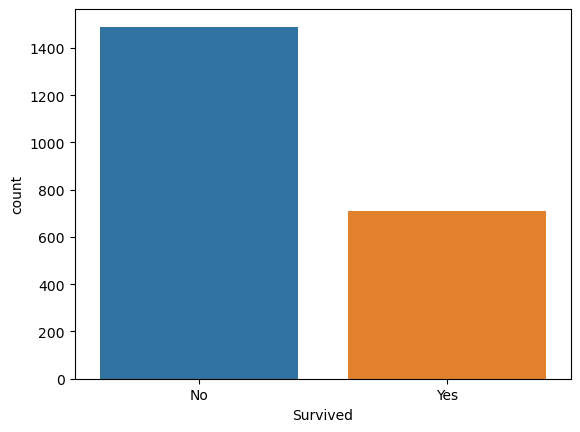

In [16]:
print(titanic_data['Survived'].value_counts())
sns.countplot(titanic_data['Survived'])
plt.show()

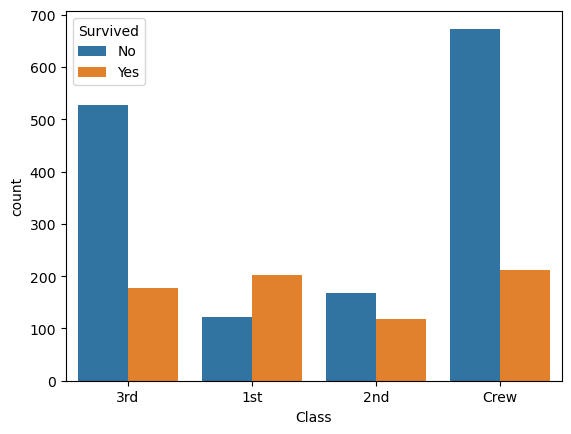

Class  Survived
1st    No          122
       Yes         203
2nd    No          167
       Yes         118
3rd    No          528
       Yes         178
Crew   No          673
       Yes         212
Name: Class, dtype: int64

In [18]:
sns.countplot(x=titanic_data['Class'],hue=titanic_data['Survived'])
plt.show()
titanic_data.groupby(by=['Class','Survived'])['Class'].count()

In [28]:
grpdata = titanic_data.groupby(['Class', 'Survived']).size().unstack()

a = grpdata.loc['1st', 'Yes'] / grpdata.loc['1st'].sum() * 100
b = grpdata.loc['2nd', 'Yes'] / grpdata.loc['2nd'].sum() * 100
c = grpdata.loc['3rd', 'Yes'] / grpdata.loc['3rd'].sum() * 100
d = grpdata.loc['Crew', 'Yes'] / grpdata.loc['Crew'].sum() * 100

print('% survived in 1st class:', a)
print('% survived in 2nd class:', b)
print('% survived in 3rd class:', c)
print('% survived in Crew class:', d)


% survived in 1st class: 62.46153846153846
% survived in 2nd class: 41.40350877192983
% survived in 3rd class: 25.21246458923513
% survived in Crew class: 23.954802259887007


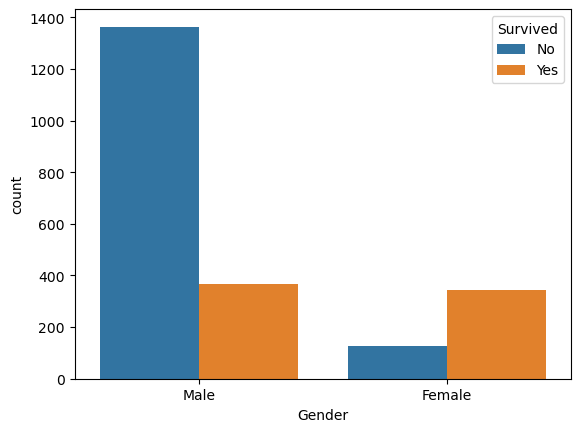

Gender  Survived
Female  No           126
        Yes          344
Male    No          1364
        Yes          367
Name: Gender, dtype: int64

In [34]:
sns.countplot(x=titanic_data['Gender'],hue=titanic_data['Survived'])
plt.show()
titanic_data.groupby(by=['Gender','Survived'])['Gender'].count()

In [37]:
grpdata1=titanic_data.groupby(by=['Gender','Survived'])['Gender'].count()
a1= grpdata1['Male'][1]/(grpdata1['Male'][0]+grpdata1['Male'][1])*100
b1= grpdata1['Female'][1]/(grpdata1['Female'][0]+grpdata1['Female'][1])*100
print('% survival of Males ', a1)
print('% survival of Females ', b1)

% survival of Males  21.201617562102832
% survival of Females  73.19148936170212


### Train Split Test

In [50]:
# Split the data into features (X) and target variable (y)
X = titanic_data[['Class', 'Gender', 'Age']]
y = titanic_data['Survived']

In [51]:
# Convert categorical variables into numerical values using one-hot encoding
X_encoded = pd.get_dummies(X)


In [52]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)


In [53]:
# Initialize and fit the Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

### Prediction

In [56]:
# Make predictions on the testing set
y_pred = model.predict(X_test)


### Evaluate the model's accuracy

In [55]:
# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7505668934240363


#                                        THANK YOU